## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [3]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.8,0.2]

In [12]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Mm in MOMENTUM:
    keras.backend.clear_session()
    print("Experiment with Mm = %.6f" %(Mm))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=True,momentum = Mm)
    model.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle = True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Mm-%s" % str(Mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Epoch 1/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.9132 - acc: 0.3161 - val_loss: 1.8366 - val_acc: 0.3577
Epoch 2/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7171 - acc: 0.3929 - val_loss: 2.1497 - val_acc: 0.2879
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6331 - acc: 0.4250 - val_loss: 1.6260 - val_acc: 0.4229
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.5733 - acc: 0.4431 - val_loss: 1.5802 - val_acc: 0.4368
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.5208 - acc: 0.4639 - val_loss: 1.5135 - val_acc: 0.4623
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4849 - acc: 0.4752 - val_loss: 1.5350 - val_acc: 0.4545
Epoch 7/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4470 - acc: 0.4879 - val_loss: 1.5075 - val_acc: 0.4587
Epoch 8/50
50000/50000 [==========

50000/50000 [==============================] - 5s 104us/step - loss: 1.8626 - acc: 0.3416 - val_loss: 1.8286 - val_acc: 0.3483
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7938 - acc: 0.3682 - val_loss: 1.8180 - val_acc: 0.3476
Epoch 4/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.7452 - acc: 0.3836 - val_loss: 1.7926 - val_acc: 0.3466
Epoch 5/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7129 - acc: 0.3954 - val_loss: 1.6970 - val_acc: 0.4081
Epoch 6/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6806 - acc: 0.4069 - val_loss: 1.6849 - val_acc: 0.4012
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6516 - acc: 0.4192 - val_loss: 1.6648 - val_acc: 0.4049
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6277 - acc: 0.4278 - val_loss: 1.6478 - val_acc: 0.4142
Epoch 9/50
50000/50000 [=====================

In [17]:
results.keys()

dict_keys(['exp-Mm-0.95', 'exp-Mm-0.8', 'exp-Mm-0.2'])

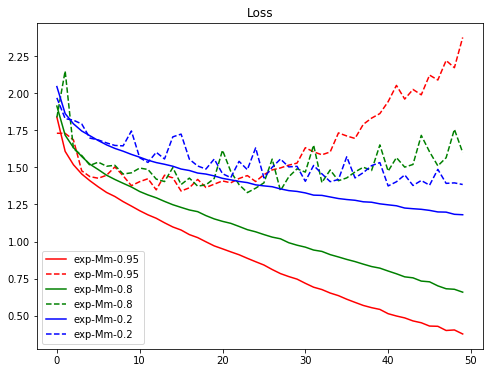

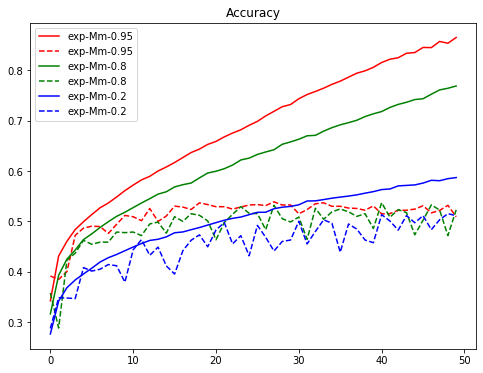

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [23]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Mm in MOMENTUM:
    keras.backend.clear_session()
    print("Experiment with Mm = %.6f" %(Mm))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=False,momentum = Mm)
    model.compile(loss = "categorical_crossentropy",metrics = ["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,
              epochs = EPOCHS,
              batch_size = BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle = True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Mm-%s" % str(Mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss':bvalid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Epoch 1/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9375 - acc: 0.3030 - val_loss: 1.7920 - val_acc: 0.3492
Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7352 - acc: 0.3802 - val_loss: 1.7134 - val_acc: 0.3869
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6365 - acc: 0.4189 - val_loss: 1.6151 - val_acc: 0.4250
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5759 - acc: 0.4425 - val_loss: 1.6063 - val_acc: 0.4375
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5259 - acc: 0.4603 - val_loss: 1.5651 - val_acc: 0.4380
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4902 - acc: 0.4692 - val_loss: 1.5083 - val_acc: 0.4585
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4536 - acc: 0.4847 - val_loss: 1.4811 - val_acc: 0.4696
Epoch 8/50
50000/50000 [==========

50000/50000 [==============================] - 5s 103us/step - loss: 1.8563 - acc: 0.3442 - val_loss: 1.8594 - val_acc: 0.3470
Epoch 3/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7865 - acc: 0.3688 - val_loss: 1.7569 - val_acc: 0.3759
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.7356 - acc: 0.3882 - val_loss: 1.7221 - val_acc: 0.3950
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6948 - acc: 0.4017 - val_loss: 1.7349 - val_acc: 0.3754
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6655 - acc: 0.4112 - val_loss: 1.6802 - val_acc: 0.4076
Epoch 7/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.6375 - acc: 0.4244 - val_loss: 1.7963 - val_acc: 0.3530
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6153 - acc: 0.4289 - val_loss: 1.6213 - val_acc: 0.4294
Epoch 9/50
50000/50000 [=======================

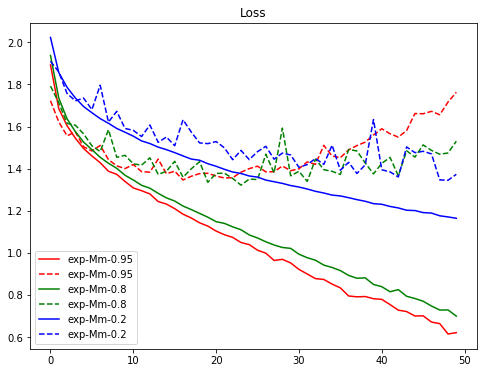

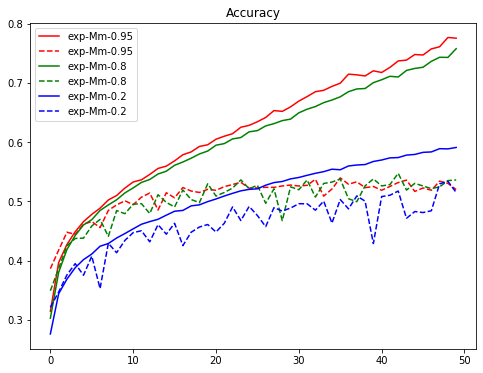

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()